In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

experimentName = "combined_heuristic_convolution"
with open("results/{}.pkl".format(experimentName), 'rb') as resultsFile:
    results = pickle.load(resultsFile)
    del results[-1]
    
    df = pd.DataFrame(results)

experimentName = "combined_heuristic_convolution_nopriority"
with open("results/{}.pkl".format(experimentName), 'rb') as resultsFile:
    results = pickle.load(resultsFile)
    del results[-1]
    
    df1 = pd.DataFrame(results)

def remove_last(group):
    return group.iloc[:-1]

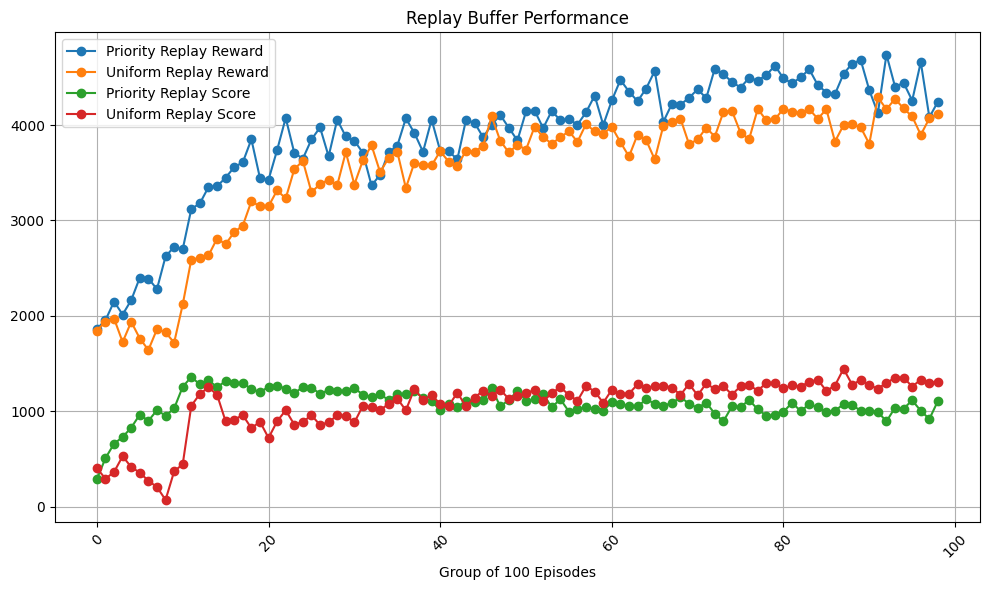

In [56]:
# Group the DataFrame by every 100 episodes
grouped = df.groupby((df['episode']) // 100)
grouped1 = df1.groupby((df1['episode']) // 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1]
sum_score = grouped['score'].sum().iloc[:-1]

sum_rewards1 = grouped1['total_reward'].sum().iloc[:-1]
sum_score1 = grouped1['score'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='Priority Replay Reward')
sum_rewards1.plot(marker='o', linestyle='-', label='Uniform Replay Reward')
sum_score.plot(marker='o', linestyle='-', label='Priority Replay Score')
sum_score1.plot(marker='o', linestyle='-', label='Uniform Replay Score')
plt.title('Replay Buffer Performance')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

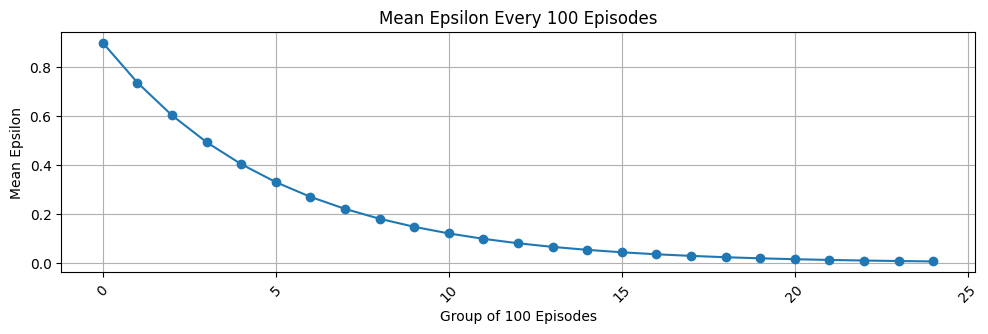

In [55]:
# Group the DataFrame by every 50 episodes
grouped = df.groupby((df['episode']) // 100)

# Calculate the sum of total lines cleared and mean epsilon for every 50 episodes
sum_lines_cleared = grouped['total_lines_cleared'].sum().head(25)
mean_epsilon = grouped['epsilon'].mean().head(25)

# Plotting
plt.figure(figsize=(10, 6))

# Plot epsilon
plt.subplot(2, 1, 2)
mean_epsilon.plot(marker='o', linestyle='-')
plt.title('Mean Epsilon Every 100 Episodes')
plt.xlabel('Group of 100 Episodes')
plt.ylabel('Mean Epsilon')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

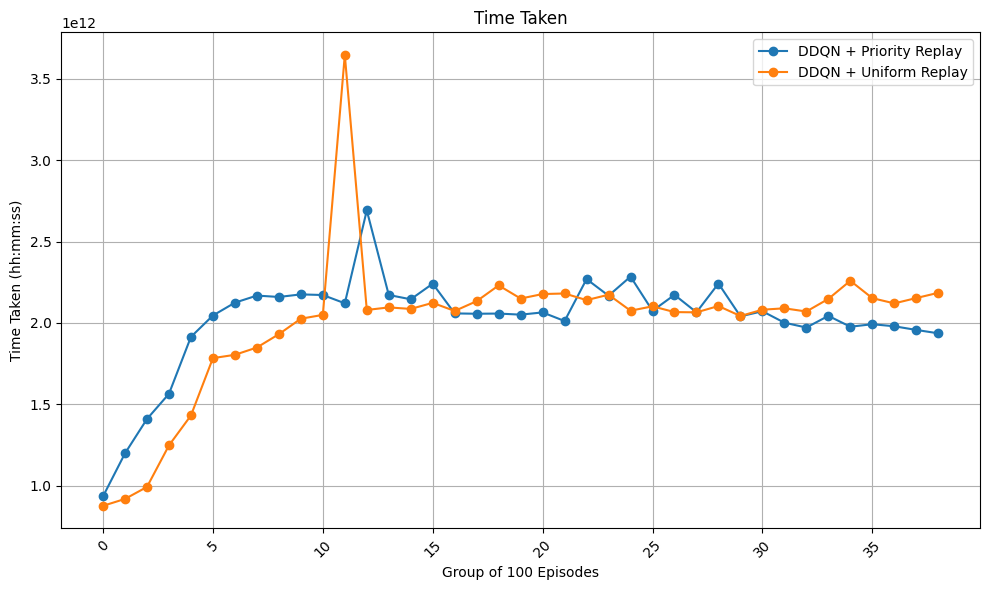

In [108]:
# Calculate the time difference between consecutive steps
df['time_diff'] = df['timestamp'].diff()
df1['time_diff'] = df1['timestamp'].diff()

# Compute the average time difference
average_time_diff = df['time_diff'].mean()
average_time_diff1 = df1['time_diff'].mean()

# Filter out rows where the time difference is greater than the average time difference by a factor of 3
df_filtered = df[df['time_diff'] <= 1 * average_time_diff]
df_filtered1 = df1[df1['time_diff'] <= 1 * average_time_diff1]

# Group the DataFrame by every 100 episodes
grouped = df.groupby((df_filtered['episode']) // 250)
grouped1 = df1.groupby((df_filtered1['episode']) // 250)

# Calculate the time taken for every 100 episodes
time_taken = grouped['timestamp'].max() - grouped['timestamp'].min().iloc[:-1]
time_taken1 = grouped1['timestamp'].max() - grouped1['timestamp'].min().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
time_taken.plot(marker='o', linestyle='-', label='DDQN + Priority Replay')
time_taken1.plot(marker='o', linestyle='-', label='DDQN + Uniform Replay')
plt.title('Time Taken')
plt.xlabel('Group of 100 Episodes')
plt.ylabel('Time Taken (hh:mm:ss)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

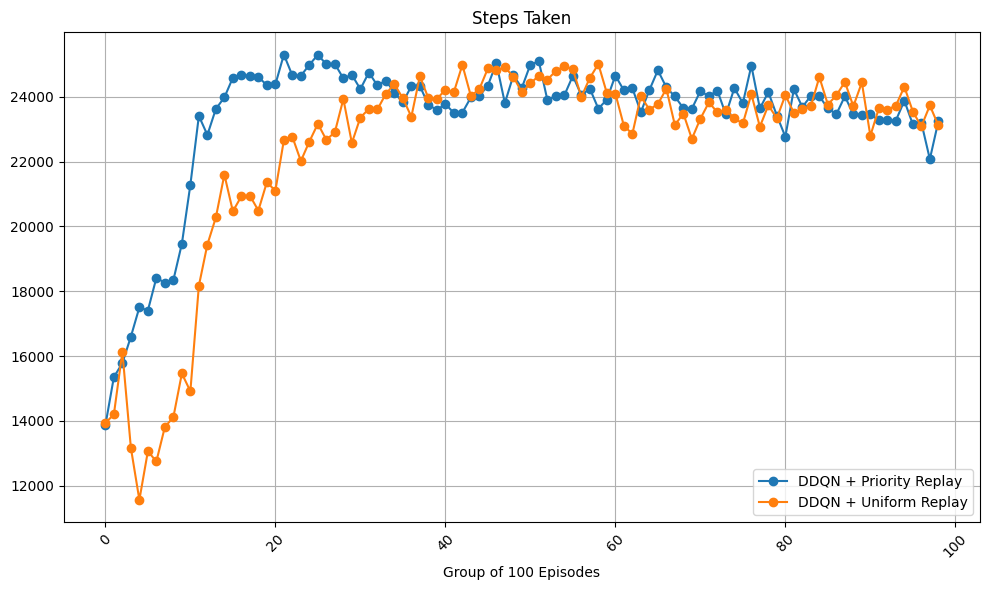

In [53]:
# Group the DataFrame by every 100 episodes
grouped = df.groupby((df['episode']) // 100)
grouped1 = df1.groupby((df1['episode']) // 100)

# Calculate the sum of total rewards for every 100 episodes
sum_steps = grouped['steps'].sum().iloc[:-1]
sum_steps1 = grouped1['steps'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_steps.plot(marker='o', linestyle='-', label='DDQN + Priority Replay')
sum_steps1.plot(marker='o', linestyle='-', label='DDQN + Uniform Replay')
plt.title('Steps Taken')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

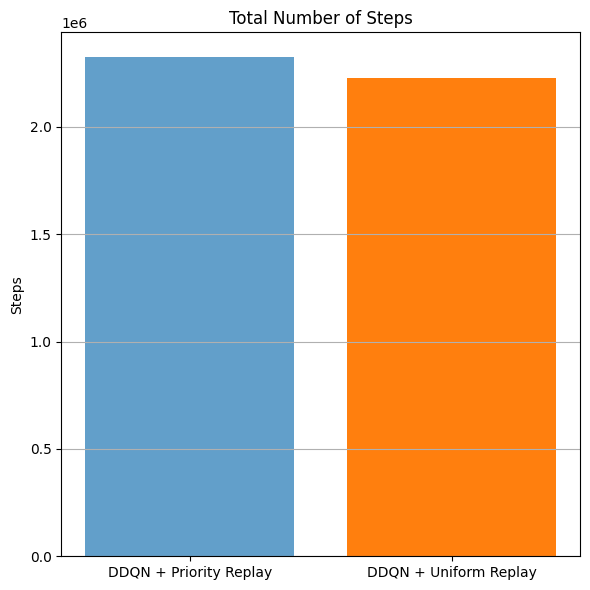

In [112]:
# Calculate the total steps across all episodes
total_steps = df['steps'].sum()
total_steps1 = df1['steps'].sum()

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(['DDQN + Priority Replay'], [total_steps], align='center', alpha=0.7)
plt.bar(['DDQN + Uniform Replay'], [total_steps1], align='center', alpha=0.7)
plt.title('Total Number of Steps')
plt.ylabel('Steps')
plt.grid(axis='y')
plt.tight_layout()
plt.show()